In [1]:
import pandas as pd
import re
import numpy as np
import datetime
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Funkcja do usunięcia dwukropka na końcu wartości
def remove_last_character(value):
    pattern = r':$'  # Wzorzec do dopasowania ostatniego dwukropka
    return re.sub(pattern, '', value)

# Funkcja do konwersji liczby sekund na format hh:mm:ss
def format_time(seconds):
    minutes, seconds = divmod(seconds, 60)
    hours, minutes = divmod(minutes, 60)
    return f'{int(hours)}:{int(minutes):02d}:{int(seconds):02d}'

# Wczytanie danych z pliku CSV
data = pd.read_csv('women_half_marathon.csv')


In [3]:
data

,Place,Time,Athlete,Country,Date of Birth,City,Event Date
0,1,62:52,Letesenbet Gidey,ETH,20.03.98,Valencia,24.10.2021
1,2,63:51,Yalemzerf Yehualaw,ETH,03.08.99,Valencia,24.10.2021
2,3,64:02,Ruth Chepngetich,KEN,08.08.94,Istanbul,04.04.2021
3,4,64:14,Girmawit Gebrzihair,ETH,21.11.01,Ra's Al Khaymah,19.02.2022
4,5,64:22,Helen Obiri,KEN,13.12.89,Ra's Al Khaymah,19.02.2022
...,...,...,...,...,...,...,...
3022,3007,70:29,Fatiha Asmid,MAR,13.04.92,Laayoune,03.11.2019
3023,3007,70:29,Yumi Yoshikawa,JPN,31.10.90,Osaka,26.01.2020
3024,3007,70:29,Yukari Abe,JPN,29.11.91,Okoyama,20.12.2020
3025,3007,70:29,Anna Matsuda,JPN,18.04.94,Yamaguchi,12.02.2022


In [5]:
# Konwersja kolumny 'Event Date' na typ daty
data['Event Date'] = pd.to_datetime(data['Event Date'])

# Dodanie nowej kolumny 'Year' na podstawie kolumny 'Event Date'
data['Year'] = data['Event Date'].dt.year

# Filtrowanie danych od roku 1975
data = data[data['Year'] >= 1975]

In [6]:
data

,Place,Time,Athlete,Country,Date of Birth,City,Event Date,Year
0,1,62:52,Letesenbet Gidey,ETH,20.03.98,Valencia,2021-10-24,2021.0
1,2,63:51,Yalemzerf Yehualaw,ETH,03.08.99,Valencia,2021-10-24,2021.0
2,3,64:02,Ruth Chepngetich,KEN,08.08.94,Istanbul,2021-04-04,2021.0
3,4,64:14,Girmawit Gebrzihair,ETH,21.11.01,Ra's Al Khaymah,2022-02-19,2022.0
4,5,64:22,Helen Obiri,KEN,13.12.89,Ra's Al Khaymah,2022-02-19,2022.0
...,...,...,...,...,...,...,...,...
3022,3007,70:29,Fatiha Asmid,MAR,13.04.92,Laayoune,2019-03-11,2019.0
3023,3007,70:29,Yumi Yoshikawa,JPN,31.10.90,Osaka,2020-01-26,2020.0
3024,3007,70:29,Yukari Abe,JPN,29.11.91,Okoyama,2020-12-20,2020.0
3025,3007,70:29,Anna Matsuda,JPN,18.04.94,Yamaguchi,2022-12-02,2022.0


In [7]:
col_names = data.columns.tolist()
col_names

['Place',
 'Time',
 'Athlete',
 'Country',
 'Date of Birth',
 'City',
 'Event Date',
 'Year']

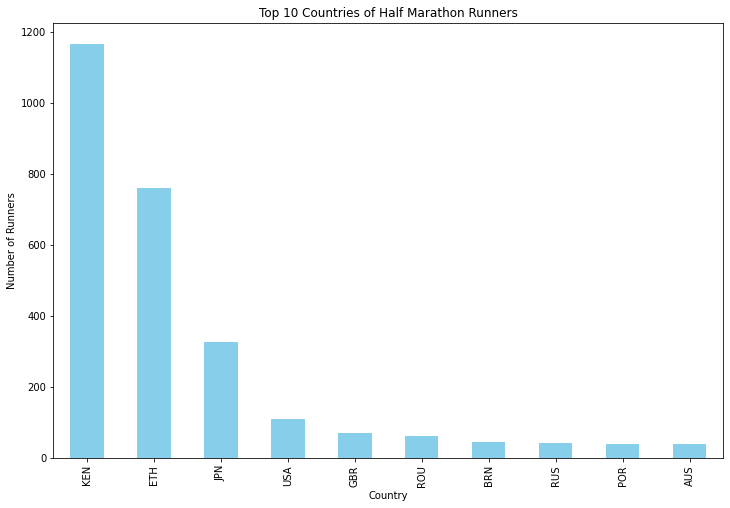

In [8]:
country_counts = data['Country'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(12, 8))
country_counts.plot(kind='bar', color='skyblue')

# Set chart title and labels
plt.title('Top 10 Countries of Half Marathon Runners')
plt.xlabel('Country')
plt.ylabel('Number of Runners')

# Show the plot
plt.show()


In [10]:
country_counts

KEN    1167
ETH     760
JPN     325
USA     109
GBR      69
ROU      62
BRN      44
RUS      41
POR      40
AUS      38
Name: Country, dtype: int64

In [16]:
count_names = country_counts.index.tolist()
count_names

['KEN', 'ETH', 'JPN', 'USA', 'GBR', 'ROU', 'BRN', 'RUS', 'POR', 'AUS']

In [20]:
num_run = country_counts.tolist()
num_run

[1167, 760, 325, 109, 69, 62, 44, 41, 40, 38]

In [11]:
data_population = pd.read_csv('world_population.csv')

In [12]:
data_population

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [13]:
data_population = data_population[['CCA3', '2022 Population']]

In [19]:
result_list = []

for element in count_names:
    # Check if the element is present in the 'CCA3' column
    if element in data_population['CCA3'].values:
        # Retrieve the corresponding value from the '2022 population' column
        population = data_population.loc[data_population['CCA3'] == element, '2022 Population'].iloc[0]
        result_list.append(population)

# Print the result list
print(result_list)

[54027487, 123379924, 123951692, 338289857, 67508936, 19659267, 449002, 144713314, 26177413]


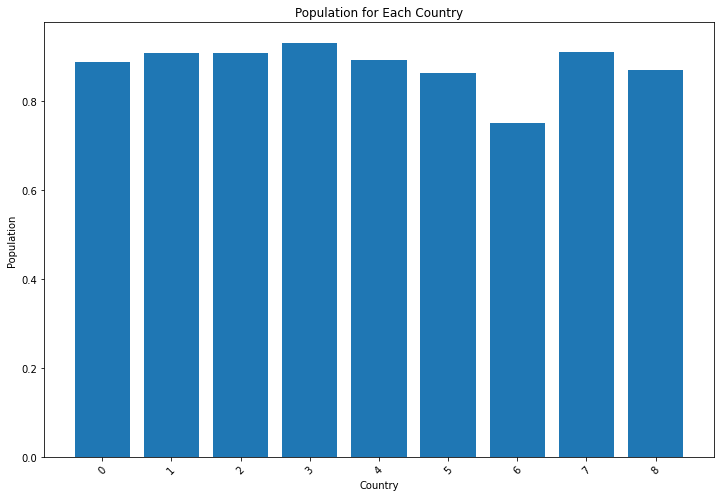

In [27]:
result_list = np.log10(result_list)
# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(range(len(result_list)), result_list)
plt.xticks(range(len(result_list)), rotation=45)
# Set chart title and labels
plt.title('Population for Each Country')
plt.xlabel('Country')
plt.ylabel('Population')

# Show the plot
plt.show()